In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,balanced_accuracy_score,accuracy_score,f1_score,precision_score,recall_score

In [65]:
df = pd.read_csv('/content/DATA.csv')

In [66]:
df.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [67]:
categories= df.columns

In [68]:
for x in categories:
  print()
  print('\n_____',x,'_____')
  print()
  print(df[x].value_counts())



_____ Patient_ID _____

P0        1
P16650    1
P16672    1
P16671    1
P16670    1
         ..
P8331     1
P8330     1
P8329     1
P8328     1
P24999    1
Name: Patient_ID, Length: 25000, dtype: int64


_____ Systemic Illness _____

Fever                    6382
Swollen Lymph Nodes      6252
None                     6216
Muscle Aches and Pain    6150
Name: Systemic Illness, dtype: int64


_____ Rectal Pain _____

False    12655
True     12345
Name: Rectal Pain, dtype: int64


_____ Sore Throat _____

True     12554
False    12446
Name: Sore Throat, dtype: int64


_____ Penile Oedema _____

True     12612
False    12388
Name: Penile Oedema, dtype: int64


_____ Oral Lesions _____

False    12514
True     12486
Name: Oral Lesions, dtype: int64


_____ Solitary Lesion _____

True     12527
False    12473
Name: Solitary Lesion, dtype: int64


_____ Swollen Tonsils _____

True     12533
False    12467
Name: Swollen Tonsils, dtype: int64


_____ HIV Infection _____

True     12584
False  

In [69]:
#df.drop(['Patient_ID'], axis=1, inplace=True)

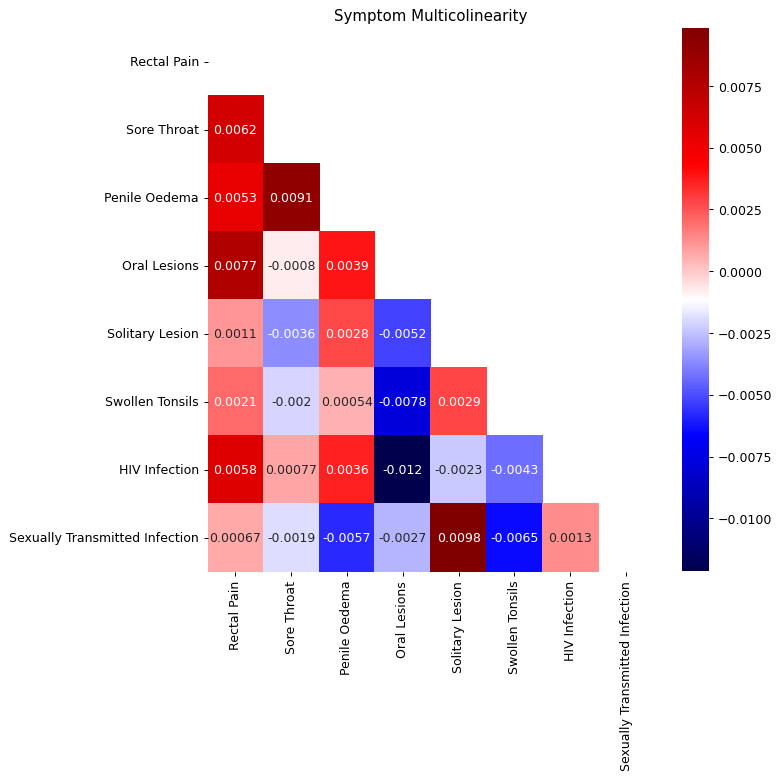

In [70]:
figure(figsize=(8, 8), dpi=90)
sns.heatmap(df.corr(),cmap="seismic",mask= np.triu(df.corr()),annot=True)
plt.title('Symptom Multicolinearity')
plt.savefig('Heatmap.png')

In [71]:
sys_ill = pd.crosstab(df['Systemic Illness'], columns=df['MonkeyPox'])

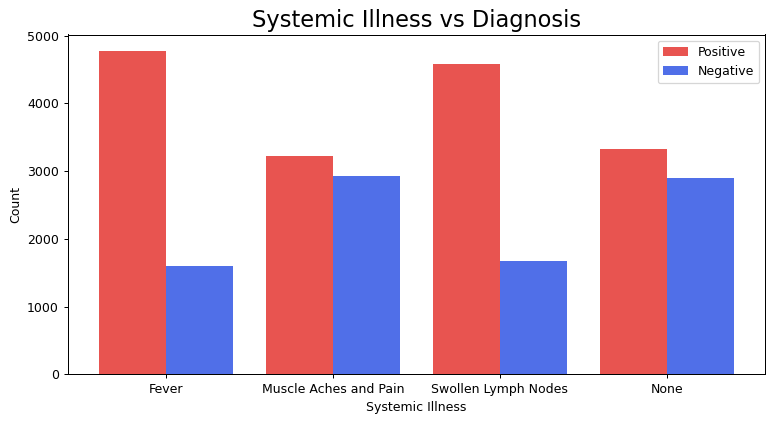

In [72]:
x = ['Fever', 'Muscle Aches and Pain','Swollen Lymph Nodes','None']
positive = [4780,3224,4581,3324]
negative = [1602, 2926,1671,2892]
x_axis = np.arange(len(x))
figure(figsize=(10,5), dpi=90)

plt.xticks(x_axis,x)
plt.xlabel('Systemic Illness')
plt.ylabel('Count')
plt.title('Systemic Illness vs Diagnosis', size=18)

plt.bar(x_axis-0.2, positive,0.4, label='Positive',color='#E85450')
plt.bar(x_axis+0.2, negative,0.4,label='Negative', color='#506FE8')
plt.legend()
plt.savefig('Systemic_illness_Bar.png')


In [73]:
# df.replace(True,'1', inplace=True)
# df.replace(False,'0',inplace=True)

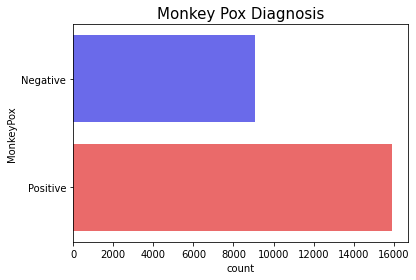

In [74]:
sns.countplot(y=df['MonkeyPox'], palette = "seismic")
plt.title('Monkey Pox Diagnosis', size=15)
plt.savefig('Countplot.png')

In [75]:
df['Systemic Illness'].unique()

array(['None', 'Fever', 'Swollen Lymph Nodes', 'Muscle Aches and Pain'],
      dtype=object)

In [76]:
# df['MonkeyPox'] = df['MonkeyPox'].replace('Positive','1')
# df['MonkeyPox'] = df['MonkeyPox'].replace('Negative','0')

In [77]:
# df['Systemic Illness'] = df['Systemic Illness'].map({'None':'0','Fever':'1','Swollen Lymph Nodes':'2','Muscle Aches and Pain':'3'})


In [78]:
df = df.replace([True, False], [1,0])
df = df.replace(["Positive", "Negative"],[1,0])
df.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,0,1,1,1,0,1,0,0,0
1,P1,Fever,1,0,1,1,0,0,1,0,1
2,P2,Fever,0,1,1,0,0,0,1,0,1
3,P3,None,1,0,0,0,1,1,1,0,1
4,P4,Swollen Lymph Nodes,1,1,1,0,0,1,1,0,1


In [79]:
df_x = df.drop(['MonkeyPox','Patient_ID'],axis=1)
df_x.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
0,None,0,1,1,1,0,1,0,0
1,Fever,1,0,1,1,0,0,1,0
2,Fever,0,1,1,0,0,0,1,0
3,None,1,0,0,0,1,1,1,0
4,Swollen Lymph Nodes,1,1,1,0,0,1,1,0


In [80]:
df_x_model = pd.get_dummies(df_x,drop_first=True)

In [81]:
df_x_model

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Systemic Illness_Muscle Aches and Pain,Systemic Illness_None,Systemic Illness_Swollen Lymph Nodes
0,0,1,1,1,0,1,0,0,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,0
3,1,0,0,0,1,1,1,0,0,1,0
4,1,1,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
24995,1,1,0,1,1,0,0,1,0,1,0
24996,0,1,1,0,1,1,1,1,0,0,0
24997,1,1,0,0,1,1,0,0,0,1,0
24998,0,1,0,1,1,1,0,0,0,0,1


In [82]:
y=df['MonkeyPox']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df_x_model,y,test_size=0.20)


In [84]:
X_train , X_valid, y_train, y_valid = train_test_split(X_train , y_train, test_size=0.20)

In [85]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 7) 
clf_tree.fit(X_train, y_train)
y_pred = clf_tree.predict(X_valid)


print("\n Decision Tree F1 score: ",f1_score(y_pred,y_valid)*100)    
print("\n Decision Tree precision: ",precision_score(y_pred,y_valid)*100)
print("\n Decision Tree recall is: ",recall_score(y_pred,y_valid)*100)
print("\n Decision Tree accuracy: ",accuracy_score(y_pred,y_valid)*100)


 Decision Tree F1 score:  77.75668679896464

 Decision Tree precision:  88.14553990610328

 Decision Tree recall is:  69.5585057116394

 Decision Tree accuracy:  67.77499999999999


In [86]:
tree_cm= confusion_matrix(y_pred,y_valid)
tree_cm

array([[ 458,  303],
       [ 986, 2253]])

In [87]:
print('Decision Tree Sensitivity:',"{:.2f}".format((tree_cm[0,0]/(tree_cm[0,0]+tree_cm[0,1])*100)))

print('Decision Tree Specificity:',"{:.2f}".format((tree_cm[1,1]/(tree_cm[1,0]+tree_cm[1,1])*100)))


Decision Tree Sensitivity: 60.18
Decision Tree Specificity: 69.56


In [88]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 50, max_depth = 10, min_samples_leaf = 50, max_features = 'auto')
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_valid)

print("\n Random Forest F1 score: ",f1_score(y_pred_rfc,y_valid)*100)    
print("\n Random Forest precision: ",precision_score(y_pred_rfc,y_valid)*100)
print("\n Random Forest recall: ",recall_score(y_pred_rfc,y_valid)*100)
print("\n Random Forest accuracy: ",accuracy_score(y_pred_rfc,y_valid)*100)


 Random Forest F1 score:  78.81689177637202

 Random Forest precision:  90.17996870109546

 Random Forest recall:  69.99696325539023

 Random Forest accuracy:  69.025


In [89]:
random_tree_confusion_mat= confusion_matrix(y_pred_rfc,y_valid)
random_tree_confusion_mat

array([[ 456,  251],
       [ 988, 2305]])

In [90]:
print('Random Forest Sensitivity:',"{:.2f}".format((random_tree_confusion_mat[0,0]/(random_tree_confusion_mat[0,0]+random_tree_confusion_mat[0,1])*100)))

print('Random Forest Specificity:',"{:.2f}".format((random_tree_confusion_mat[1,1]/(random_tree_confusion_mat[1,0]+random_tree_confusion_mat[1,1])*100)))


Random Forest Sensitivity: 64.50
Random Forest Specificity: 70.00


In [91]:
from sklearn.svm import SVC

svm = SVC(C=100, gamma= 10,kernel = "rbf")
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_valid)

print("\n Support Vector Machine F1 score: ",f1_score(y_pred_svm,y_valid)*100)    
print("\n Support Vector Machine precision: ",precision_score(y_pred_svm,y_valid)*100)
print("\n Support Vector Machine recall: ",recall_score(y_pred_svm,y_valid)*100)
print("\n Support Vector Machine accuracy: ",accuracy_score(y_pred_svm,y_valid)*100)


 Support Vector Machine F1 score:  77.07419750920891

 Support Vector Machine precision:  85.95461658841941

 Support Vector Machine recall:  69.85691573926867

 Support Vector Machine accuracy:  67.325


In [92]:
svm_confusion_mat= confusion_matrix(y_pred_svm,y_valid)
svm_confusion_mat

array([[ 496,  359],
       [ 948, 2197]])

In [93]:
print('Support Vector Machine Sensitivity:',"{:.2f}".format((svm_confusion_mat[0,0]/(svm_confusion_mat[0,0]+svm_confusion_mat[0,1])*100)))

print('Support Vector Machine Specificity:',"{:.2f}".format((svm_confusion_mat[1,1]/(svm_confusion_mat[1,0]+svm_confusion_mat[1,1])*100)))


Support Vector Machine Sensitivity: 58.01
Support Vector Machine Specificity: 69.86


In [94]:
svm_confusion_mat

array([[ 496,  359],
       [ 948, 2197]])